# Heart Disease Prediction Dataset

## Import Library

In [44]:
#import pandas library
import pandas as pd 
import numpy as np

#import prediction library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#hide warnings
import warnings
warnings.filterwarnings("ignore")

## Preparing Dataset

### Loading csv dataset

In [45]:
#loading csv dataset from Gtihub URL into pandas dataframe
data = pd.read_csv('https://raw.githubusercontent.com/nullbytee/DigitalSkola_DataScience_Batch11/main/dataset/heart.csv')

In [46]:
#print 5 row dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [47]:
#checking dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [48]:
#checking null / missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [49]:
print('There is NO MISSING Values in this dataset')

There is NO MISSING Values in this dataset


In [50]:
#statistical summary of dataframe
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [51]:
#count of unique values
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

## Data Visualization

### Correlation Matrix

In [52]:
#correlation matrix
data.corr().style.background_gradient()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


### Histogram

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

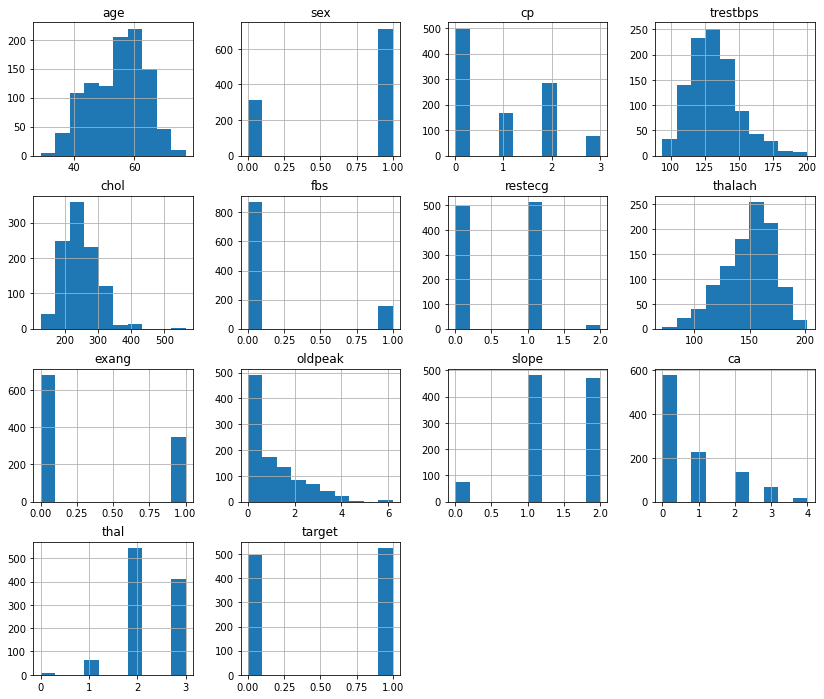

In [53]:
#histogram
data.hist(figsize = (14,12))

## Splitting Features dan Target

### Splitting

In [54]:
#split features
x = data.drop(columns='target', axis=1)
Y = data['target']

In [55]:
print(x)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [56]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


### Split Dataset into train & test Data

In [57]:
#split dataset into x,Y train and test data
x_train, x_test, Y_train, Y_test = train_test_split(x,Y, test_size=0.3, stratify=Y, random_state=0)
print(x.shape, x_train.shape, x_test.shape)

(1025, 13) (717, 13) (308, 13)


## Model Training

### Logistic Regression

In [58]:
model = LogisticRegression()

In [59]:
#train model using logistic regression
model.fit(x_train, Y_train)

LogisticRegression()

### Model Evaluation

#### Evaluation Score

In [60]:
#accuracy score on data train
x_train_prediction = model.predict(x_train)
data_train_accuracy = accuracy_score(x_train_prediction, Y_train)

print('Accuracy Data Train : ', data_train_accuracy)

Accuracy Data Train :  0.8619246861924686


In [61]:
#accuracy score in data test
x_test_prediction = model.predict(x_test)
data_test_accuracy = accuracy_score(x_test_prediction, Y_test)

print('Accuracy Data Test : ',data_test_accuracy)

Accuracy Data Test :  0.8344155844155844


## Building Predictive Sysytem

#### Case 1

In [62]:
#input data from values :
#age,sex,cp,trestbps,chol,fbs etc
data_input = (71,0,0,112,149,0,1,125,0,1.6,1,0,2)

#change input data to numpy array
data_input_as_numpy_array = np.asarray(data_input)

#reshape numpy array
data_input_reshaped = data_input_as_numpy_array.reshape(1,-1)

prediction = model.predict(data_input_reshaped)

print(prediction)

#print data input result
if (prediction [0]==0) :
    print('This Person does not have Heart Disease')
else :
    print('this Person has Heart Disease')

[1]
this Person has Heart Disease


#### Case 2

In [63]:
#input data from values :
#age,sex,cp,trestbps,chol,fbs etc
data_input = (70,1,0,145,174,0,1,125,1,2.6,0,0,3)

#change input data to numpy array
data_input_as_numpy_array = np.asarray(data_input)

#reshape numpy array
data_input_reshaped = data_input_as_numpy_array.reshape(1,-1)

prediction = model.predict(data_input_reshaped)

print(prediction)

#print data input result
if (prediction [0]==0) :
    print('This Person does not have Heart Disease')
else :
    print('this Person has Heart Disease')

[0]
This Person does not have Heart Disease
